In [1]:
import network as nw
import numpy as np 
from scipy.sparse import csr_matrix
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(1)

In [2]:
#collecting data from csv file
data = np.genfromtxt("connections.csv", delimiter=",")
#matrix dimension
N = int(np.max(data)) + 1
#generating the sparse matrix from data
A = csr_matrix((np.ones(len(data)), (data[:, 0], data[:, 1])), shape = (N, N), dtype = np.int32)
#making the network undirected
A = A + A.T
#removing multilinks
A = 1*(A > 0)

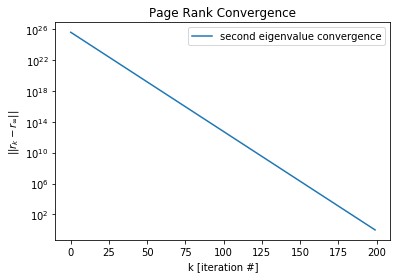

In [3]:
#I want an error that is around 1e-15 so i check the convergence of power iteration
#to find out the number of iterations needed
d = 1 / nw.get_degrees(A)
M = A * sp.sparse.diags(d[:, 0])
v = nw.get_two_highest_eigenvalues(M)
v2 = v[1]

plt.title("Page Rank Convergence")
ind = np.arange(200)
ref = (0.85*np.abs(v2))**ind
plt.semilogy(ind, ref/ref[-1])
plt.xlabel("k [iteration #]")
plt.ylabel(r"$||r_k - r_\infty||$")
plt.legend(["second eigenvalue convergence"])


In [4]:
#from the previous graph the error is reduced by a factor o 1e15 
#after more or less 125 iterations
num_iter = 125
p = nw.page_rank_power_iteration(A, iter_num = num_iter)

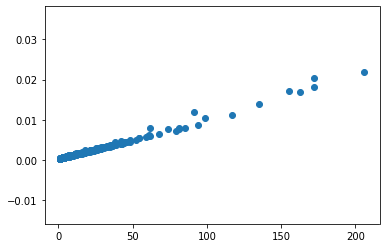

In [5]:
d = nw.get_degrees(A)
plt.scatter(d, p)

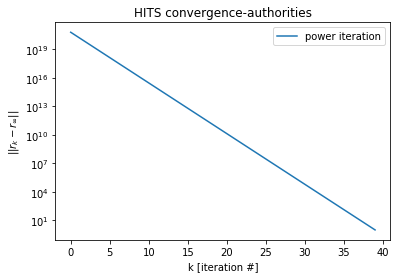

In [6]:
#I want an error that is around 1e-15 so i check the convergence of power iteration
#to find out the number of iterations needed
v = nw.get_two_highest_eigenvalues(A*A.T)

plt.figure()
plt.title("HITS convergence-authorities")
ind = np.arange(40)
ref = np.abs(v[1]/v[0])**ind
plt.semilogy(ind, ref/ref[-1])
plt.xlabel("k [iteration #]")
plt.ylabel(r"$||r_k - r_\infty||$")
plt.legend(["power iteration", "second eigenvalue"])


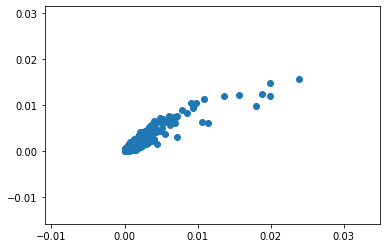

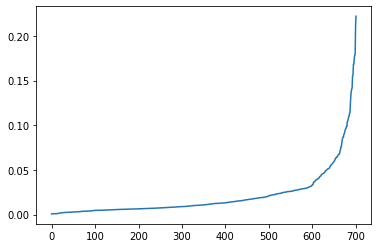

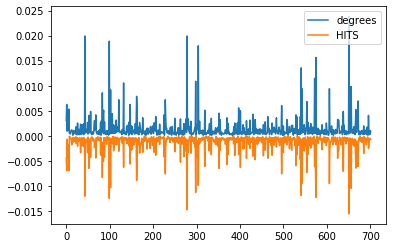

In [7]:
#i see that 40 iterations reduce the error by a reasonable amount
num_iter = 40

r = nw.hits_power_iteration(A, iter_num=num_iter)
d = d/np.sum(d)
plt.scatter(d, r/np.sum(r))
plt.figure()
plt.plot(np.sort(r-p, axis=0))
plt.figure()
plt.plot(d)
plt.plot(-r/np.sum(r))
plt.legend(["degrees", "HITS"])

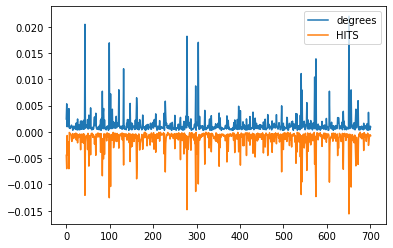

In [8]:
plt.plot(p)
plt.plot(-r/np.sum(r))
plt.legend(["degrees", "HITS"])

In [9]:
#array that contains the name of each character so it's index is it's id
characters_id = []

#reading from file
with open("nodes.csv", "r") as fp:
    for line in fp:
        #for each line get name and id
        name, name_ID = line.replace("\n", "").split(",")
        characters_id.append(name)

In [10]:
#index that would sort from less ranked to most ranked with hits and normal degrees
ids_r = np.argsort(r, axis = 0)
ids_d = np.argsort(d, axis = 0)

#ranking based on the rank difference obtained with the two ranking methods
ids_rd = np.argsort(r-d, axis = 0)

#positions in the ranking the one with the highest rank is assigned position 0
positions = np.arange(N)[::-1]

#getting the position of each character with both rankings
position_d = positions[np.argsort(ids_d, axis = 0)]
position_r = positions[np.argsort(ids_r, axis = 0)]

#points = position
#scores = 
#increment in position with HITS rank compared with the other
delta_pos = position_d - position_r
ids_delta = np.argsort(delta_pos, axis = 0)
characters_r = [characters_id[i[0]] for i in ids_r[::-1]]
characters_d = [characters_id[i[0]] for i in ids_d[::-1]]
characters_rd = [characters_id[i[0]] for i in ids_delta[::-1]]
pos_d = [position_d[i[0]][0] for i in ids_delta[::-1]]
pos_r = [position_r[i[0]][0] for i in ids_delta[::-1]]
pd_dict = {
    "HITS":characters_r, 
    "deg":characters_d
}
pd_imp_dict = {
    "character_improvement":characters_rd,
    "improvement": np.sort(delta_pos, axis = 0)[::-1,0],
    "d_pos": pos_d,
    "r_pos": pos_r

}
df = pd.DataFrame(pd_dict)
df_imp = pd.DataFrame(pd_imp_dict)

In [11]:
df_imp[(df_imp["r_pos"] < 10) | (df_imp["d_pos"] < 10)]

,character_improvement,improvement,d_pos,r_pos
357,Cersei Lannister,5,13,8
364,Tywin Lannister,3,10,7
371,Joffrey Baratheon,2,8,6
374,Sansa Stark,2,5,3
379,Robb Stark,1,6,5
383,Catelyn Stark,1,3,2
389,Tyrion Lannister,0,0,0
390,Jaime Lannister,0,1,1
394,Arya Stark,-2,2,4
400,Jon Snow,-5,4,9


In [12]:
df.head()

,HITS,deg
0,Tyrion Lannister,Tyrion Lannister
1,Jaime Lannister,Jaime Lannister
2,Catelyn Stark,Arya Stark
3,Sansa Stark,Catelyn Stark
4,Arya Stark,Jon Snow


In [13]:
f = nw.spectral_clustering_reordering
communities, separators = nw.divide_in_communities(A, f, conductance_lim=0.25)

In [14]:
def print_community(community, character_id):
    print([character_id[idx] for idx in community])
print(len(communities))

15


In [15]:
i = 10
print(f'community index = {communities[i]["path"]}')
print(f"community")
chara = communities[i]["indexes"]
chara.sort()
print_community(chara, characters_id)
print(f"borderline character = {characters_id[communities[i]['border']]}")

community index = 01111
community
['Aenys Frey', 'Alesander', 'Alysanne', 'Alyx Frey', 'Amabel', 'Ami', 'Arwyn', 'Belmores', 'Benfrey', 'Bertram Beesbury', 'Beth', 'Bethany', 'Botley', 'Brandon Stark', 'Brynden Tully', 'Burley', 'Catelyn Stark', 'Cleos Frey', 'Cley Cerwyn', 'Dacey Mormont', 'Damon', 'Danny Flint', 'Danwell Frey', 'Delp', 'Desmond Grell', 'Donnel Locke', 'Dustin', 'Edmure Tully', 'Edwyn Frey', 'Elenya', 'Eleyna', 'Elwood Harte', 'Farlen', 'Forley Prester', 'Gage', 'Galbart Glover', 'Gawen Westerling', 'Greatjon', 'Hallis Mollen', 'Harren', 'Harrion Karstark', 'Harys Haigh', 'Hodor', 'Hosteen Frey', 'Hoster Tully', 'Hother Whoresbane', 'Howland', 'Jaehaerys', 'Jason Mallister', 'Jeyne Westerling', 'Jinglebell Frey', 'Jonos', 'Karlon Stark', 'Leobald Tallhart', 'Leslyn Haigh', 'Lothar Frey', 'Lucas Blackwood', 'Lucias Vypren', 'Lymond Goodbrook', 'Lyn Corbray', 'Lynesse Hightower', 'Lythene', 'Maege Mormont', 'Maester Brenett', 'Maester Luwin', 'Maester Vyman', 'Maester W

In [16]:
def get_sep_tree(separators, path=""):
    if len(separators) == 3:
        print(f"{characters_id[separators[1]]}, path:{path}")
        get_sep_tree(separators[0] ,path+"0")
        get_sep_tree(separators[2], path+"1")
    elif len(separators) == 1:
        print(f"{characters_id[separators[0]]}, path:{path}")
    elif len(separators) == 2 and type(separators[0]) == np.int64:
        print(f"{characters_id[separators[0]]}, path:{path}")
        get_sep_tree(separators[1], path+"1")
    else:
        print(f"{characters_id[separators[1]]}, path:{path}")
        get_sep_tree(separators[0], path+"0")
get_sep_tree(separators)

Gage, path:
Lyonel Selmy, path:0
Merry Crane, path:01
Stafford, path:010
Aerion Brightflame, path:0100
Arys Oakheart, path:0101
Bessa, path:01011
Nage, path:011
Megga, path:0110
Nage, path:01101
Garse Goodbrook, path:0111
Jarman Buckwell, path:1
Jeor Mormont, path:11
Knott, path:110


In [17]:
auc_roc = {}
precision = {}

In [18]:
rwwr = "Random walk with restart"
lrw = "Local random walk"
srw = "Superposed random walk"
cn = "Common neighbours"
aa = "Adamic Adar"
ra = "Resource Allocation"

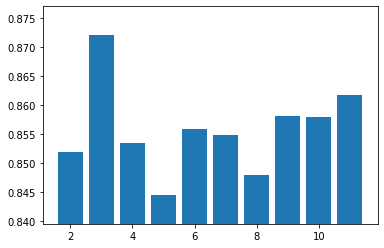

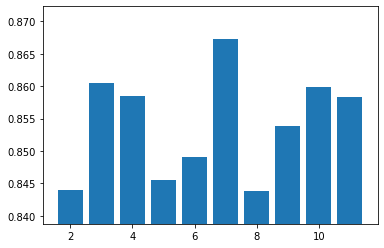

In [19]:
auc_roc[rwwr] = nw.ROC_AUC(A, nw.random_walk_with_restart_link_prediction)
precision[rwwr] = nw.precision(A, nw.random_walk_with_restart_link_prediction)

roc_aucs = []
t_range = range(2, 12)
for t in t_range:
    roc_aucs.append(nw.ROC_AUC(A, nw.local_random_walk_link_prediction, [t]))

roc_aucs = np.array(roc_aucs)
plt.bar(t_range, roc_aucs )
plt.ylim([np.min(roc_aucs) - 0.005, np.max(roc_aucs) + 0.005])
best_t = [t_range[np.argmax(np.array(roc_aucs))]]
auc_roc[lrw] = nw.ROC_AUC(A, nw.local_random_walk_link_prediction, best_t)
precision[lrw] = nw.precision(A, nw.local_random_walk_link_prediction, best_t)

roc_aucs = []
for t in t_range:
    roc_aucs.append(nw.ROC_AUC(A, nw.superposed_random_walk_link_prediction, [t]))

plt.figure()
roc_aucs = np.array(roc_aucs)
plt.bar(t_range, roc_aucs )
plt.ylim([np.min(roc_aucs)-0.005, np.max(roc_aucs)+0.005])
best_t = [t_range[np.argmax(np.array(roc_aucs))]]
auc_roc[srw] = nw.ROC_AUC(A, nw.superposed_random_walk_link_prediction, best_t)
precision[srw] = nw.precision(A, nw.superposed_random_walk_link_prediction, best_t)

In [20]:
auc_roc[cn] = nw.ROC_AUC(A, nw.common_neigh_link_prediction)
precision[cn] = nw.precision(A, nw.common_neigh_link_prediction)
auc_roc[aa] = nw.ROC_AUC(A, nw.adamic_adar_link_prediction)
precision[aa] = nw.precision(A, nw.adamic_adar_link_prediction)
auc_roc[ra] = nw.ROC_AUC(A, nw.resource_allocation_link_prediction)
precision[ra] = nw.precision(A, nw.resource_allocation_link_prediction)

In [ ]:
l = range(2, 7)
beta = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001, 0.00003, 0.00001]
katz_res = np.zeros((len(l), len(beta)))
for i, l_i in enumerate(l):
    for j, b in enumerate(beta):
        roc_auc = nw.ROC_AUC(A, nw.katz_link_prediction, (l_i, b))
        katz_res[i, j] = roc_auc

In [ ]:
import seaborn as sns
ax = sns.heatmap(katz_res, cmap = "Blues", xticklabels=beta, yticklabels=l, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
rows, cols = np.unravel_index(np.argmax(katz_res), katz_res.shape)
print(l[rows], beta[cols])

In [ ]:
auc_roc["katz"] = nw.ROC_AUC(A, nw.katz_link_prediction, (l[rows], beta[cols]))
precision["katz"] = nw.precision(A, nw.katz_link_prediction, (l[rows], beta[cols]))

In [ ]:
df = pd.DataFrame({"AUC_ROC":auc_roc, "Precision":precision})
df.head(10)

In [ ]:
df.to_latex()

In [ ]:
S = nw.resource_allocation_link_prediction(A) 
S[A.toarray()==1] = 0
new_links = nw.get_new_links(S, 30)

for link in new_links:
    print(characters_id[link[0]],"<->", characters_id[link[1]])


In [ ]:
S = nw.common_neigh_link_prediction(A) 
S1 = nw.common_neigh_link_prediction(A) 
print(np.sum(np.abs(S1 - S)))

In [ ]:
ind = np.unravel_index(np.argmax(S), S.shape)
print(ind)
S[ind[0], ind[1]] = 0
S[ind[1], ind[0]] = 0